## 🏅 Online Course Certificate Type Prediction

Given *data about online courses from MIT and Harvard*, let's try to predict whether a given course offers **honor code certificates**.

We will use a random forest classification model within a scikit-learn pipeline to make our predictions.

Data source: https://www.kaggle.com/datasets/edx/course-study

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('archive/appendix.csv')
data

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,3003,15.04,8.32,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,5783,14.27,9.22,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,2082,17.13,12.49,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,HarvardX,CS50x,10/15/2012,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,1439,9.96,1.11,11.11,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,HarvardX,PH207x,10/15/2012,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",1,1,52521,10729,5058,20.44,9.64,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,HarvardX,MUS24.4x,07/21/2016,First Nights: Symphonie Fantastique,Tom Kelly,"Humanities, History, Design, Religion, and Edu...",4,0,615,305,20,49.59,3.25,6.56,80.81,8.78,3.25,1.71,5.93,38.0,56.82,43.18,74.66
286,HarvardX,GSE4x,07/25/2016,Introduction to Family Engagement in Education,Karen Mapp,"Humanities, History, Design, Religion, and Edu...",4,0,2871,267,20,9.30,0.70,7.49,70.11,0.00,0.70,4.26,11.33,34.0,25.24,74.76,82.31
287,MITx,6.302.0x,08/01/2016,Introduction to Control System Design,"Jacob White, Joe Steinmeyer","Science, Technology, Engineering, and Mathematics",4,0,3937,974,49,24.74,1.24,5.03,12.27,4.72,8.23,15.62,58.50,24.0,91.17,8.83,61.32
288,MITx,6.302.1x,08/01/2016,Introduction to State Space Control,"Jacob White, Joe Steinmeyer","Science, Technology, Engineering, and Mathematics",4,0,1431,208,8,14.54,0.56,3.85,0,3.84,5.73,3.22,62.38,25.0,93.44,6.56,72.31


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Institution                                   290 non-null    object 
 1   Course Number                                 290 non-null    object 
 2   Launch Date                                   290 non-null    object 
 3   Course Title                                  290 non-null    object 
 4   Instructors                                   289 non-null    object 
 5   Course Subject                                290 non-null    object 
 6   Year                                          290 non-null    int64  
 7   Honor Code Certificates                       290 non-null    int64  
 8   Participants (Course Content Accessed)        290 non-null    int64  
 9   Audited (> 50% Course Content Accessed)       290 non-null    int

### Preprocessing

In [4]:
df = data.copy()

In [5]:
# Drop unused columns
df = df.drop(['Course Number', 'Course Title', 'Instructors'], axis=1)
df

,Institution,Launch Date,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,09/05/2012,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,3003,15.04,8.32,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,09/26/2012,Computer Science,1,1,62709,8949,5783,14.27,9.22,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,10/09/2012,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,2082,17.13,12.49,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,HarvardX,10/15/2012,Computer Science,1,1,129400,12888,1439,9.96,1.11,11.11,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,HarvardX,10/15/2012,"Government, Health, and Social Science",1,1,52521,10729,5058,20.44,9.64,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,HarvardX,07/21/2016,"Humanities, History, Design, Religion, and Edu...",4,0,615,305,20,49.59,3.25,6.56,80.81,8.78,3.25,1.71,5.93,38.0,56.82,43.18,74.66
286,HarvardX,07/25/2016,"Humanities, History, Design, Religion, and Edu...",4,0,2871,267,20,9.30,0.70,7.49,70.11,0.00,0.70,4.26,11.33,34.0,25.24,74.76,82.31
287,MITx,08/01/2016,"Science, Technology, Engineering, and Mathematics",4,0,3937,974,49,24.74,1.24,5.03,12.27,4.72,8.23,15.62,58.50,24.0,91.17,8.83,61.32
288,MITx,08/01/2016,"Science, Technology, Engineering, and Mathematics",4,0,1431,208,8,14.54,0.56,3.85,0,3.84,5.73,3.22,62.38,25.0,93.44,6.56,72.31


In [6]:
# Fill missing values
df['% Played Video'] = df['% Played Video'].replace('---', np.nan).astype(float)
df['% Played Video'] = df['% Played Video'].fillna(df['% Played Video'].mean())

In [7]:
df.dtypes

Institution                                      object
Launch Date                                      object
Course Subject                                   object
Year                                              int64
Honor Code Certificates                           int64
Participants (Course Content Accessed)            int64
Audited (> 50% Course Content Accessed)           int64
Certified                                         int64
% Audited                                       float64
% Certified                                     float64
% Certified of > 50% Course Content Accessed    float64
% Played Video                                  float64
% Posted in Forum                               float64
% Grade Higher Than Zero                        float64
Total Course Hours (Thousands)                  float64
Median Hours for Certification                  float64
Median Age                                      float64
% Male                                          

In [8]:
# Extract date features
df['Launch Date'] = pd.to_datetime(df['Launch Date'])

df['Launch Year'] = df['Launch Date'].apply(lambda x: x.year)
df['Launch Month'] = df['Launch Date'].apply(lambda x: x.month)
df['Launch Day'] = df['Launch Date'].apply(lambda x: x.day)
df = df.drop('Launch Date', axis=1)

In [9]:
df

,Institution,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher,Launch Year,Launch Month,Launch Day
0,MITx,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,3003,15.04,8.32,54.98,83.20,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68,2012,9,5
1,MITx,Computer Science,1,1,62709,8949,5783,14.27,9.22,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04,2012,9,26
2,MITx,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,2082,17.13,12.49,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76,2012,10,9
3,HarvardX,Computer Science,1,1,129400,12888,1439,9.96,1.11,11.11,0.00,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78,2012,10,15
4,HarvardX,"Government, Health, and Social Science",1,1,52521,10729,5058,20.44,9.64,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33,2012,10,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,HarvardX,"Humanities, History, Design, Religion, and Edu...",4,0,615,305,20,49.59,3.25,6.56,80.81,8.78,3.25,1.71,5.93,38.0,56.82,43.18,74.66,2016,7,21
286,HarvardX,"Humanities, History, Design, Religion, and Edu...",4,0,2871,267,20,9.30,0.70,7.49,70.11,0.00,0.70,4.26,11.33,34.0,25.24,74.76,82.31,2016,7,25
287,MITx,"Science, Technology, Engineering, and Mathematics",4,0,3937,974,49,24.74,1.24,5.03,12.27,4.72,8.23,15.62,58.50,24.0,91.17,8.83,61.32,2016,8,1
288,MITx,"Science, Technology, Engineering, and Mathematics",4,0,1431,208,8,14.54,0.56,3.85,0.00,3.84,5.73,3.22,62.38,25.0,93.44,6.56,72.31,2016,8,1


In [10]:
# Split df into X and y
y = df['Honor Code Certificates'].copy()
X = df.drop('Honor Code Certificates', axis=1).copy()

In [11]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [12]:
X_train.shape

(203, 21)

In [13]:
y_train.value_counts()

Honor Code Certificates
1    166
0     37
Name: count, dtype: int64

### Building Pipeline

In [14]:
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, drop='if_binary'))
])

preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_transformer, ['Institution', 'Course Subject'])
], remainder='passthrough')

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        class_weight={
            0: 0.1,
            1: 1.0
        }
    ))
])

### Training

In [15]:
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehot', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Results

Accuracy: 98.85


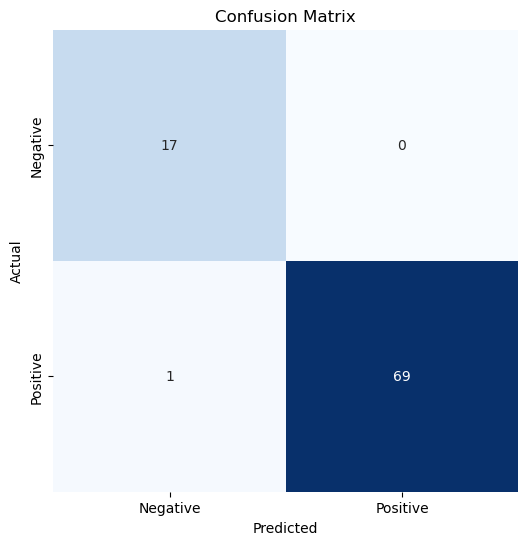

Classification Report:
---------------------
               precision    recall  f1-score   support

    Negative       0.94      1.00      0.97        17
    Positive       1.00      0.99      0.99        70

    accuracy                           0.99        87
   macro avg       0.97      0.99      0.98        87
weighted avg       0.99      0.99      0.99        87



In [16]:
y_pred = model.predict(X_test)

acc = model.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
clr = classification_report(y_test, y_pred, labels=[0,1], target_names=['Negative', 'Positive'])

print("Accuracy: {:.2f}".format(acc * 100))

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report:\n---------------------\n', clr)